In [192]:
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.formatters import decimal_to_percent
from plottable.plots import circled_image # image
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline

In [191]:
cols = ["prior","bio_cons","batch_int","total","train_loss","val_loss","time","kl_scal","prior_par"]
colnames = ["Prior","Bio Cons","Batch Int","Total","Train Loss","Val Loss","Time","KL Scal","Prior Par"]
col_to_name = dict(zip(cols, colnames))

In [179]:
prior = ["Standard Normal", "Mixture of Gaussians", "Vamp", "Normal Flow"]
bio_cons = np.array([0.65,0.625,0.625,0.625])
batch_int = np.array([0.29,0.43,0.39,0.41])
total = np.array([0.47,0.5275,0.5075,0.5175])
train_loss = np.array([1,1,1,1])
val_loss = np.array([1,1,1,1])
time = np.array([1,1,1,1])
prior_par = np.array([1,1,1,1])
kl_scale = np.array([1,1,1,1])
data = np.transpose(np.array([prior, bio_cons, batch_int, total, train_loss, val_loss, time, prior_par, kl_scale]))

In [181]:
df = pd.DataFrame(data,columns=cols)

In [193]:
df = df.rename(col_to_name, axis=1)
df = df.set_index("Prior")
df[["Bio Cons","Batch Int","Total","Train Loss","Val Loss","Time","Prior Par","KL Scal"]] = df[["Bio Cons","Batch Int","Total","Train Loss","Val Loss","Time","Prior Par","KL Scal"]].astype("float64").round(2)

KeyError: "None of ['Prior'] are in the columns"

In [194]:
col_defs = (
    [
        ColumnDefinition(
            name="Prior",
            textprops={"ha": "left", "weight": "bold"},
            width=3
        ),
        ColumnDefinition(
            name="Bio Cons",
            width=1.5,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["Bio Cons"], cmap=matplotlib.cm.PRGn, num_stds=2.5)
        ),
        ColumnDefinition(
            name="Batch Int",
            width=1.5,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["Batch Int"], cmap=matplotlib.cm.PRGn, num_stds=2.5),
        ),
        ColumnDefinition(
            name="Total",
            width=1.5,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["Total"], cmap=matplotlib.cm.PRGn, num_stds=2.5),
        ),
        ColumnDefinition(
            name="Train Loss",
            width=1.5,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["Train Loss"], cmap=matplotlib.cm.PRGn, num_stds=2.5),
        ),
        ColumnDefinition(
            name="Val Loss",
            width=1.5,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["Val Loss"], cmap=matplotlib.cm.PRGn, num_stds=2.5),
        ),
        ColumnDefinition(
            name="Time",
            width=1.5,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["Time"], cmap=matplotlib.cm.PRGn, num_stds=2.5),
        ),
        ColumnDefinition(
            name="Prior Par",
            width=1.5,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["Prior Par"], cmap=matplotlib.cm.PRGn, num_stds=2.5),
        ),
        ColumnDefinition(
            name="KL Scal",
            width=1.5,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["KL Scal"], cmap=matplotlib.cm.PRGn, num_stds=2.5),
        ),
    ]

)

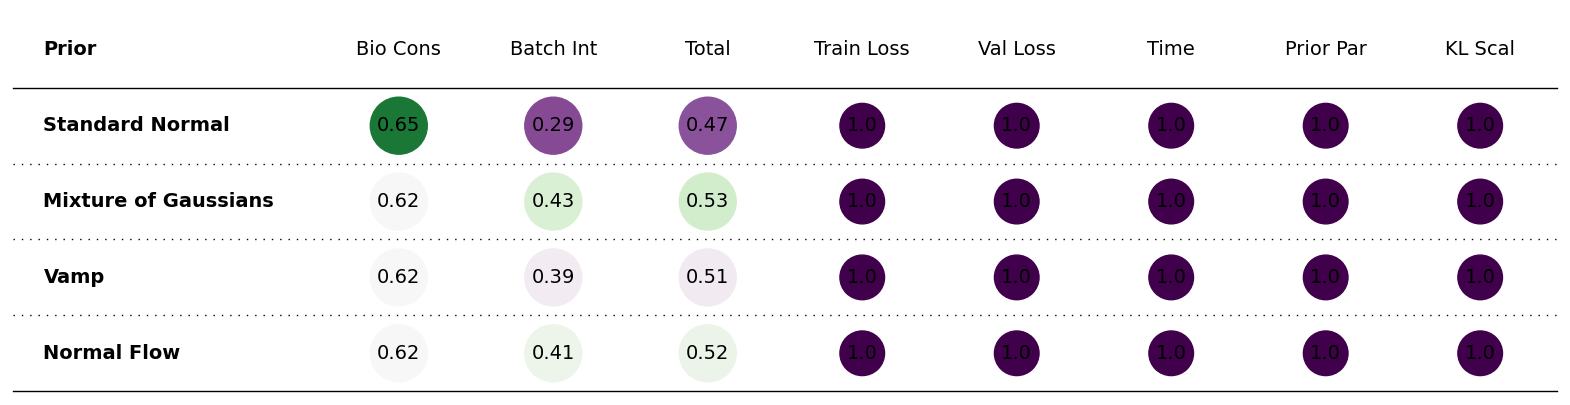

In [195]:
fig, ax = plt.subplots(figsize=(20, 5))

table = Table(
    df,
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 14},
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 1, "linestyle": "-"},
)#.autoset_fontcolors(colnames=["OFF", "DEF"])

#fig.savefig("images/wwc_table.png", facecolor=ax.get_facecolor(), dpi=200)